In [5]:
#GenTrap: on input n,,m, q, r; this algorithm return a random matrix A and a basis S for 
# lattice \lambda_perp A

#m_1>=d = (1+sigma)n logq
#m_2>=l*m_1
import numpy as np

In [2]:

def Random_Matrix(n,m):
    """
    *Input: 2 integer n,m 
    *Output: A random RANK n matrix B(nxm) with coefficients from 0 to q
    The output matrix has all column vectors independent
    """
    B=(matrix(ZZ,np.random.randint(q,size=(1,m)))) #first vector of B
    size_B=1
    while size_B < n:
        A = (matrix(ZZ,np.random.randint(q,size=(1,m))))
        h=B.rank()
        if ((B.stack(A))).rank()==h+1:
            B=B.stack(A) 
            size_B=size_B+1
    return(B)
#=============================================

#hermite normal form basis of a q-ary lattice.
def q_arybasis(A_1):
    """
    *Input: Arbitrary matrix A_1 
    *Output: A HNF basis of perp. q-ary lattice corresponding to A_1
    """
    H=matrix(ZZ,((A_1).right_kernel()).basis())
    n=A_1.nrows()
    m_1=A_1.ncols()
    for i in range(n):
        H= matrix(ZZ,np.concatenate((H,matrix(q*matrix(np.identity(m_1,dtype=int))[m_1-n+i])), axis= 0))
    H=H.T
    return H
    
def GenTrap(n,q,m_1,m_2,r):
    """
    *Input: 
    n: Security parameter (also the number of rows of matrix A)
    m = m_1+m_2 : The number of columns of matrix A
    q: A prime number.
    *Output: An nxm matrix A in Z_q and a basis (as matrix of column vectors) of perp. q-ary lattice corresponding to A.
    """
    A_1=matrix(GF(q),Random_Matrix(n,m_1))
    C=matrix(ZZ,np.identity(m_1, dtype= int))
   
    H=q_arybasis(A_1)
    HH=(H-C).T
    #generate matrix P
    P=np.zeros((m_2,m_1),int)
    for i in range(m_1):
        for j in range(m_2):
            if j==(i+1)*l-1:
                P[j][i]=1
    P=matrix(ZZ,P)

    #generate matrix G
    G_list=list(np.zeros(m_1,dtype=int))
    for i in range(m_1):
        G_list[i]=(np.matrix((HH)[i])/(2**(l-1))).astype(int)
        for j in range(l-1):
            G_list[i]=np.append(G_list[i],(np.matrix((HH)[i])/(r**(l-j-2))).astype(int),axis=0)
        G_list[i]=matrix(G_list[i]).T
    G=G_list[0]
    for i in range(1,len(G_list)):
            G=np.append(G,G_list[i],1)
    G=matrix(ZZ,G)

    #generate matrix U
    U=np.identity(m_2,int)
    for i in range(m_2):
            if i<m_2-1:
                U[i][i+1]=-r
    U=matrix(ZZ,U)

    #generate matrix R
    R=np.zeros((m_1,m_2),int)
    for i in range(m_1):
        for j in range(m_2):
            rand1=int((np.random.randint(4,size=1))[0])
            if  rand1==2:
                R[i][j]= 1
            elif rand1== 3:
                R[i][j]=-1
    R=matrix(ZZ,R)
    A_2=-A_1*(G+R)
    A=matrix(np.concatenate((A_1,A_2),axis=1))
    S_up=matrix(np.concatenate((((G+R)*U),R*P-C),axis=1))
    S_down=matrix(np.concatenate((U,P),axis=1))
    S= matrix(np.concatenate((S_up,S_down),axis=0))
    
    return A,S #,A_1
    
#================================================================
#A TEST CASE
n=3
r=2 # r can be >= 2
q= next_prime(2^10)
m_1=int(2*n*log(q,r)) # delta = 1
l= int(log(q,r))
d=int(2*n*log(q,r))
m_2=l*m_1
#======================================
#A,S=GenTrap(n,q,m_1,m_2,r)
#A,S,A_1=GenTrap(n,q,m_1,m_2,r)

In [3]:
A,S=GenTrap(n,q,m_1,m_2,r)

In [4]:
S.rank(),S.ncols()

(660, 660)

In [17]:
#test if S is basis of perp. lattice corresponding to A
A*S==matrix(np.zeros((n,m_1+m_2),int))

True

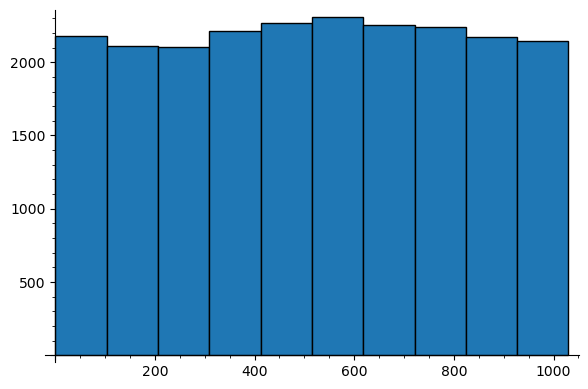

In [4]:
#Test if A is a uniformly random matrix
X=(A.rows())[0]
for i in range(n-1):
    X=np.concatenate((X,(A.rows())[i+1]))
histogram(X)

In [5]:
A_1*H==matrix(np.zeros((10,200),int))

NameError: name 'A_1' is not defined

In [ ]:
matrix(GF(q),A*S)==matrix(np.zeros((10,2200),int))

In [19]:
sigma =2000
t=zero_vector(259)


In [ ]:
e_1=SampleD(A, sigma, t) - t